In [1]:
from datasets import load_from_disk
from pathlib import Path
import soundfile as sf
import io
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import pandas as pd
import random

In [18]:
# load VoxCeleb2 dataset
REPO_ROOT = Path.cwd().parent.parent
DATA_DIR = REPO_ROOT / "data" / "raw" / "voxceleb2_10k"

# print(f"REPO_ROOT: {REPO_ROOT}")
# print(f"DATA_DIR: {DATA_DIR}")
dataset = load_from_disk(str(DATA_DIR))

print(f"\nTotal samples: {len(dataset)}")
print(f"Dataset features: {dataset.features}")

Loading dataset from disk:   0%|          | 0/31 [00:00<?, ?it/s]


Total samples: 10000
Dataset features: {'audio_path': {'array': List(Value('float64')), 'path': Value('string'), 'sampling_rate': Value('int64')}, 'transcription': Value('string'), 'language': Value('string'), 'speaker_id': Value('string'), 'gender': Value('string')}



DATAFRAME (SUBSET OF SIZE 200)
Columns: ['audio_path', 'transcription', 'language', 'speaker_id', 'gender']

speaker_id
id03701       200
Name: count, dtype: int64

AUDIO FILE STATISTICS

Analyzing 200 samples...

Sampling Rate:
  Unique rates: {24000} Hz

Duration:
  Min: 3.97s
  Max: 33.98s
  Mean: 8.17s
  Median: 6.34s

Array Length (samples):
  Min: 95,232
  Max: 815,616
  Mean: 196,009

Amplitude Range:
  Overall min: -0.9721
  Overall max: 0.9831
  Mean absolute amplitude: 0.0401

DURATION DISTRIBUTION


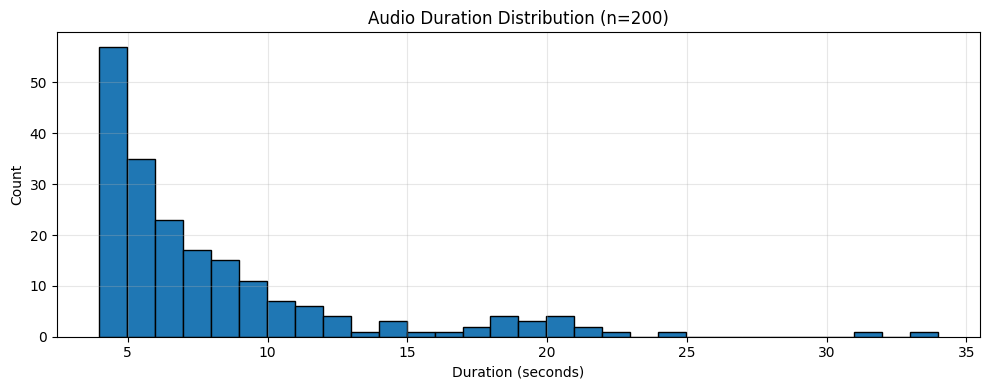

In [25]:
# load num_samples of dataset as dataframe and inspect
num_samples = 200 # set to 0 for full dataset

if num_samples == 0:
    df = pd.DataFrame(dataset)
else:
    df = pd.DataFrame(dataset[:num_samples])

print("\n" + "="*70)
print(f"DATAFRAME (SUBSET OF SIZE {num_samples})")
print("="*70)

print(f"Columns: {df.columns.tolist()}\n")
print(df[['speaker_id']].value_counts())

# audio File Statistics
print("\n" + "="*70)
print("AUDIO FILE STATISTICS")
print("="*70)

# sample a subset for efficiency (or use all if dataset is small)
sample_size = min(num_samples, len(dataset))
sample_indices = np.random.choice(len(dataset), sample_size, replace=False)

print(f"\nAnalyzing {sample_size} samples...")

sampling_rates = []
durations = []
array_lengths = []
amplitudes_min = []
amplitudes_max = []
amplitudes_mean = []

for i in sample_indices:
    audio_data = dataset[int(i)]['audio_path']
    
    # get audio properties
    audio_array = np.array(audio_data['array'])
    sr = audio_data.get('sampling_rate', 16000)
    
    sampling_rates.append(sr)
    durations.append(len(audio_array) / sr)
    array_lengths.append(len(audio_array))
    amplitudes_min.append(audio_array.min())
    amplitudes_max.append(audio_array.max())
    amplitudes_mean.append(np.abs(audio_array).mean())

print("\nSampling Rate:")
print(f"  Unique rates: {set(sampling_rates)} Hz")

print("\nDuration:")
print(f"  Min: {min(durations):.2f}s")
print(f"  Max: {max(durations):.2f}s")
print(f"  Mean: {np.mean(durations):.2f}s")
print(f"  Median: {np.median(durations):.2f}s")

print("\nArray Length (samples):")
print(f"  Min: {min(array_lengths):,}")
print(f"  Max: {max(array_lengths):,}")
print(f"  Mean: {np.mean(array_lengths):,.0f}")

print("\nAmplitude Range:")
print(f"  Overall min: {min(amplitudes_min):.4f}")
print(f"  Overall max: {max(amplitudes_max):.4f}")
print(f"  Mean absolute amplitude: {np.mean(amplitudes_mean):.4f}")

print("\n" + "="*70)
print("DURATION DISTRIBUTION")
print("="*70)

plt.figure(figsize=(10, 4))
plt.hist(durations, bins=30, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title(f'Audio Duration Distribution (n={sample_size})')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("="*70)

In [ ]:
def show_samples(dataset, indices):
    """
    Display multiple samples in a condensed format with waveform and audio player.
    
    Args:
        dataset: The loaded dataset
        indices: List of sample indices to display
    """
    for idx in indices:
        sample = dataset[idx]
        
        # extract audio data
        audio_data = sample['audio_path']
        audio_array = audio_data['array']
        if isinstance(audio_array, list):
            audio_array = np.array(audio_array)
        sampling_rate = audio_data.get('sampling_rate', 16000)
        
        # create one-line summary
        summary_parts = [f"Sample {idx}"]
        for key in ['speaker_id', 'gender', 'language']:
            if key in sample:
                summary_parts.append(f"{key}={sample[key]}")
        
        # add transcription preview (first 50 chars)
        if 'transcription' in sample and sample['transcription']:
            trans = sample['transcription']
            trans_preview = trans[:50] + "..." if len(trans) > 50 else trans
            summary_parts.append(f'"{trans_preview}"')
        
        summary = " | ".join(summary_parts)
        
        # plot waveform
        fig, ax = plt.subplots(1, 1, figsize=(12, 2))
        time_axis = np.arange(len(audio_array)) / sampling_rate
        ax.plot(time_axis, audio_array, linewidth=0.5)
        ax.set_title(summary, fontsize=10, loc='left')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitude')
        ax.grid(True, alpha=0.3)
        
        # add duration info
        duration = len(audio_array) / sampling_rate
        ax.text(0.99, 0.95, f'{duration:.2f}s', 
                transform=ax.transAxes,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # display audio player
        display(Audio(audio_array, rate=sampling_rate))
        
        print()

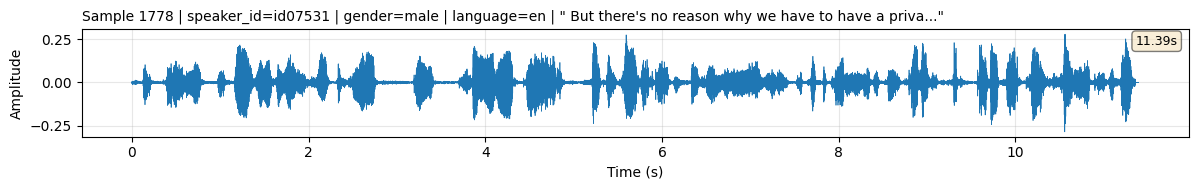

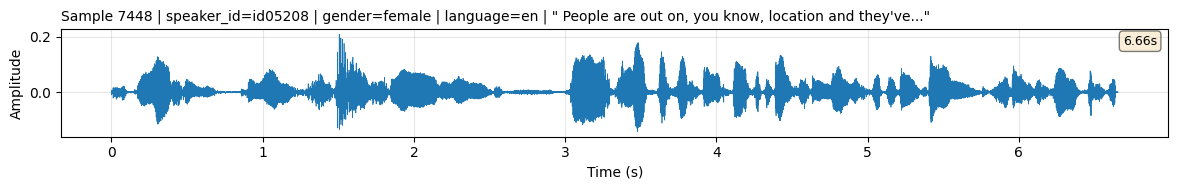

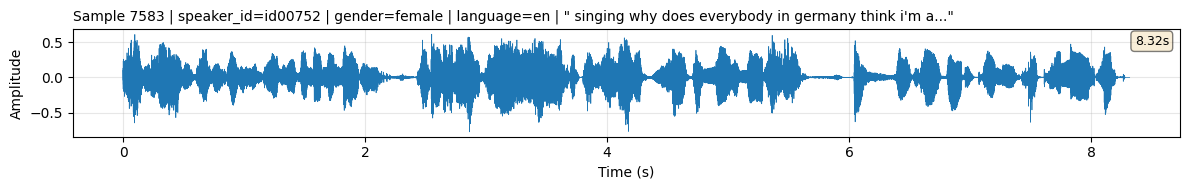

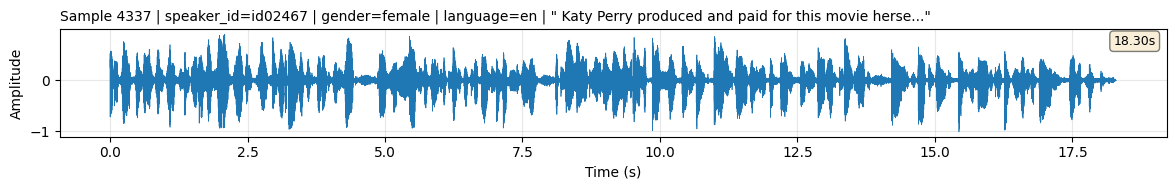

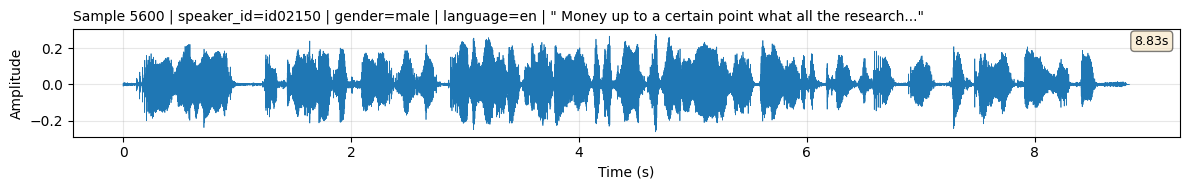

In [ ]:
# inspect N random samples
N = 5
random_indices = random.sample(range(len(dataset)), N)
show_samples(dataset, random_indices)